In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn

In [2]:
df = pd.read_csv('Cleaned-Data.csv')

In [3]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


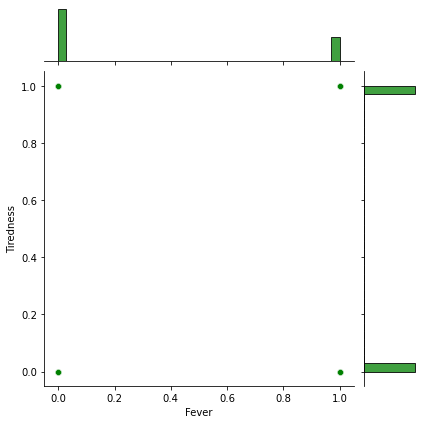

In [4]:
sns.jointplot(x='Fever',y='Tiredness',data=df,color='green')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['Fever','Tiredness','Dry-Cough','Difficulty-in-Breathing','Sore-Throat','None_Sympton','Pains','Nasal-Congestion','Runny-Nose','Diarrhea']]
y=df['Severity_Severe']

Train test split on the dataset is performed

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Logistic regression is applied on the dataset

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [12]:
predictions = logmodel.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     78438
           1       0.00      0.00      0.00     26106

    accuracy                           0.75    104544
   macro avg       0.38      0.50      0.43    104544
weighted avg       0.56      0.75      0.64    104544



/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Applying SVm on the same Dataset

In [14]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [15]:
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[78438     0]
 [26106     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     78438
           1       0.00      0.00      0.00     26106

    accuracy                           0.75    104544
   macro avg       0.38      0.50      0.43    104544
weighted avg       0.56      0.75      0.64    104544



/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

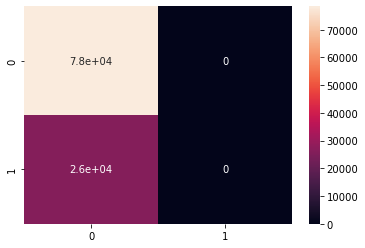

In [16]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [13]:

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.6889826293235384

In [14]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[68971  9467]
 [23048  3058]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81     78438
           1       0.24      0.12      0.16     26106

    accuracy                           0.69    104544
   macro avg       0.50      0.50      0.48    104544
weighted avg       0.62      0.69      0.65    104544



In [18]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [21]:
df['Severity_level']=df['Severity_Mild'].astype(str) +df['Severity_Moderate'].astype(str) +df['Severity_Severe'].astype(str) 

In [22]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Severity_level
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,1,China,100
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,1,0,China,100
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,1,0,0,China,100
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,0,1,China,010
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,China,010


In [23]:
df['Severity_level'].unique()

array(['100', '010', '001', '000'], dtype=object)

Multiclass classification using the above labels

In [104]:
X = df[['Fever','Tiredness','Dry-Cough','Difficulty-in-Breathing','Sore-Throat','Pains','Nasal-Congestion','Runny-Nose','Diarrhea']]
y=df['Severity_level']

In [109]:
X.describe()
X.shape[1]


9

In [123]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.utils.np_utils import to_categorical
#from keras import to_categorical
from tensorflow.keras.utils import to_categorical


from sklearn.preprocessing import LabelEncoder



In [124]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

In [125]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(4, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                160       
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 68        
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________


In [126]:


# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=8000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/8000000
25344/25344 [==============================] - 47s 2ms/step - loss: 1.3890 - accuracy: 0.2495 - val_loss: 1.3874 - val_accuracy: 0.2500
Epoch 2/8000000
25344/25344 [==============================] - 48s 2ms/step - loss: 1.3878 - accuracy: 0.2489 - val_loss: 1.3886 - val_accuracy: 0.2500
Epoch 3/8000000
25344/25344 [==============================] - 51s 2ms/step - loss: 1.3880 - accuracy: 0.2500 - val_loss: 1.3878 - val_accuracy: 0.2500
Epoch 4/8000000
25344/25344 [==============================] - 43s 2ms/step - loss: 1.3882 - accuracy: 0.2501 - val_loss: 1.3871 - val_accuracy: 0.2500
Epoch 5/8000000
25344/25344 [==============================] - 42s 2ms/step - loss: 1.3884 - accuracy: 0.2495 - val_loss: 1.3872 - val_accuracy: 0.2500
Epoch 6/8000000
25344/25344 [==============================] - 38s 2ms/step - loss: 1.3883 - accuracy: 0.2507 - val_loss: 1.3921 - val_accuracy: 0.2500
Epoch 7/8000000
25344/25344 [==============================] - 40s 2ms/step - loss: 1.38

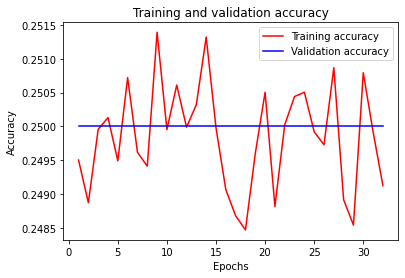

In [127]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

[0.24968249 0.2492652  0.24845742 0.25259483]
0.99999994


/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     79200
           1       0.00      0.00      0.00     79200
           2       0.00      0.00      0.00     79200
           3       0.25      1.00      0.40     79200

    accuracy                           0.25    316800
   macro avg       0.06      0.25      0.10    316800
weighted avg       0.06      0.25      0.10    316800



/Users/sreedevic/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

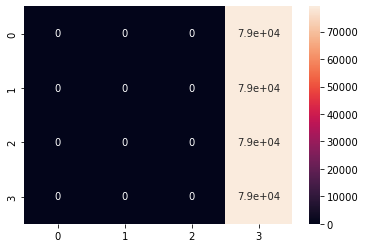

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0])) # sum it up! Should be 1

matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))


print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))


import seaborn as sns
sns.heatmap(matrix, annot=True)